<a href="https://colab.research.google.com/github/Navyam-Raushan/Machine-Learning-Models/blob/main/heart_disease_classification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting heart disease Using Machine Learning model

This notebook will use python libraries in an attempt to predict heart disease for a patient based on his past medical records.

<br>
We're going to take the following approach

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition
Given a clinical heart disease data and we need to classify peoples who have heart disease.

##2. Data
*The original data came from Cleavland from UCI. Downloaded from Kaggle.* <br>
https://www.kaggle.com/datasets/ketangangal/heart-disease-dataset-uci

Create Data Dictionary <br>
*Briefing of Data Attributes*<br>
Age<br>
Sex : male : 1<br>
female : 0<br>

chest pain type<br>
-- Value 1: typical angina<br>
-- Value 2: atypical angina<br>
-- Value 3: non-anginal pain<br>
-- Value 4: asymptomatic<br>

resting blood pressure (in mm Hg on admission to the hospital)

serum cholestoral in mg/dl

(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

resting electrocardiographic results

-- Value 0: normal<br>
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)<br>
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria<br>

thalach: maximum heart rate achieved

exercise induced angina (1 = yes; 0 = no)

Angina is chest pain or discomfort caused when your heart muscle doesn't get enough oxygen-rich blood.
It may feel like pressure or squeezing in your chest.

oldpeak = ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment

--Value 1: upsloping
-- Value 2: flat
-- Value 3: downsloping

vessels colored by flourosopy : number of major vessels (0-3) colored by flourosopy

A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

Target : 0 No Heart disease
1 Heart disease

##3. Evaluation
Set a Benchmark for your model that it should reach <br>

*So if we reach 95% Accuracy We'll pursue the project.*

We need an accurated model because here we are predicting patient's heart disease <br>
We can't be wrong here so our model should be accurate.

##4. Features
Check all about features information here<br>

https://archive.ics.uci.edu/dataset/45/heart+disease



# Data Preprocessing

In [ ]:
# importing all the tools we need (industry standards)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside screen

%matplotlib inline

# Importing models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay, roc_curve, auc


# If number conversion is included (feature engineering) (here not needed as all numbers)
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder


## Data Analysis and Exploration

In [ ]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

## Data Exploration (exploratory data analysis or EDA)

* It means you should be a subject matter expert, following you should know--

* What question(s) are we trying to solve
* What kind of data do we have and is it numbers or categorical

* What's missing from data and strategy for missing values

* Where are outliers and how you deal with it

* How we can modify features to get more from this data


In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Check class balance of target value counts (we need balanced data)
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

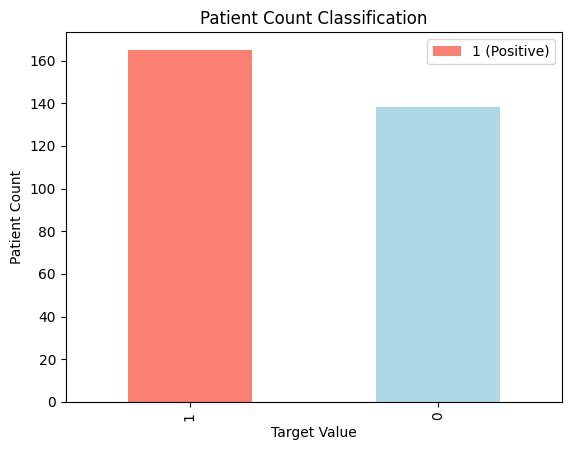

In [ ]:
# Let's visualize it
ax = df["target"].value_counts().plot(xlabel="Target Value",
                                 ylabel="Patient Count",
                                 kind="bar",
                                 color=["salmon", "lightblue"],
                                 legend=False);

ax.legend(labels=["1 (Positive)", "0 (Negative)"])
plt.title("Patient Count Classification");


In [ ]:
# Let's see more info about our data
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# Check for null values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

 **xth percentile is done by = (x/100) * Number of data**

 *It shows that X percent of values are lesser than that value*

 eg. 25th percentile = 40 means 25% data is less than 40

In [ ]:
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


*For more colors prefer*
https://matplotlib.org/stable/gallery/color/named_colors.html

## Heart Disease Frequency according to Sex

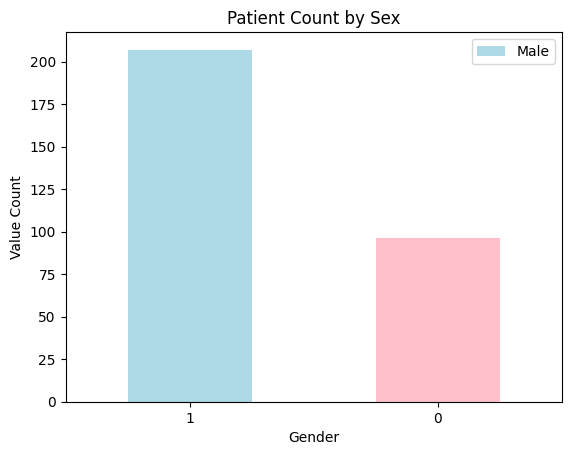

In [ ]:
# Let's find out what is the sex ratio for the patients
ax = df["sex"].value_counts().plot(xlabel="Gender", ylabel="Value Count", kind="bar", color=["lightblue", "pink"])
ax.legend(labels=["Male", "0 (Female)"])
plt.title("Patient Count by Sex")
plt.xticks(rotation=0);

In [ ]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


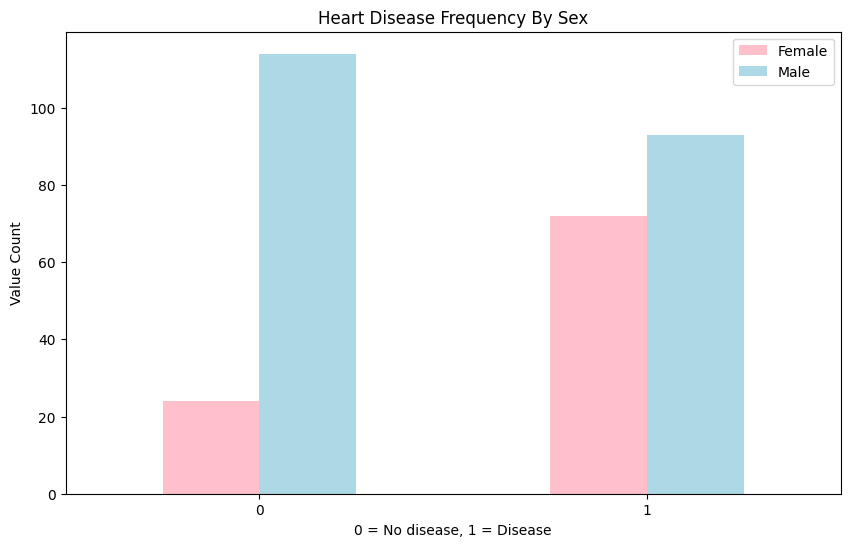

In [ ]:
# compare target column with sex column
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                    figsize=(10,6),
                                    color=["pink", "lightblue"]);
plt.title("Heart Disease Frequency By Sex")
plt.xlabel("0 = No disease, 1 = Disease")
plt.ylabel("Value Count")
plt.legend(["Female", "Male"])
# For rotating x labels to top-down
plt.xticks(rotation=0);

**Inference From Crosstab**
* 3 in every 4 female have positive chance of heart disease- *75%*

* 2 in every 4 male have positive chance of heart disease - *50%*

* Thus for any patient a chance of - *62.5%*

## Age vs Max Heart Rate(thalach)

In [ ]:
df["thalach"].value_counts()
# Here large number of different values so we prefer
# Scatter graph over bar
# Now if we need to get only those rows of age where tar=1
df["age"][df["target"]==1]
# df.age[df.target==1] another syntax for this(col name should not have spaces)

0      63
1      37
2      41
3      56
4      57
       ..
160    56
161    55
162    41
163    38
164    38
Name: age, Length: 165, dtype: int64

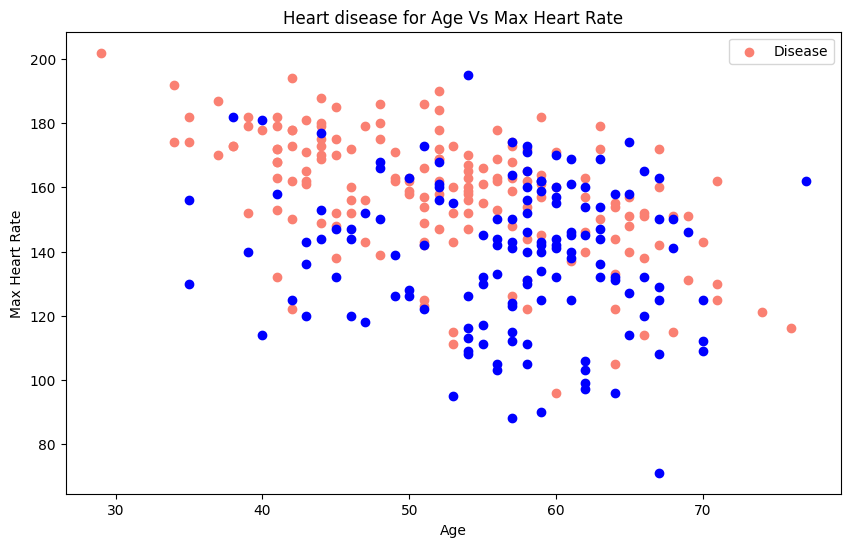

In [ ]:
# Create another figure for comparison
plt.figure(figsize=(10,6))

plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")
plt.title("Heart disease for Age Vs Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"])

# Scatter Negative examples on same plot

plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="blue");

**Inference Drawn from above Analysis** <br>
Even after less max heart rate as age increase there is chance of heart disease
<br>
As age increases max heart rate decreases.

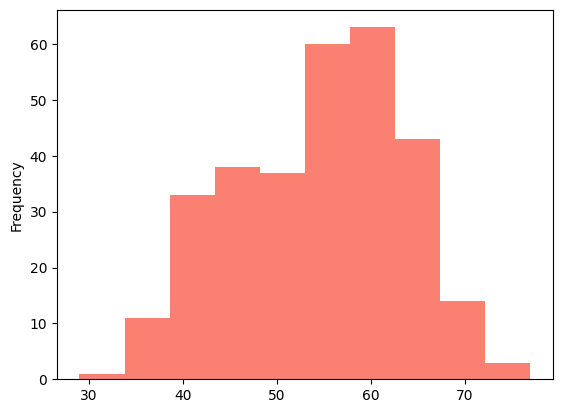

In [ ]:
# Check the distribution of age column for distribution use hist
df.age.plot.hist(color="salmon");

# This is a normal distribution

## Heart Disease Frequency per chest Pain type

chest pain type<br>
-- Value 1: typical angina<br>
-- Value 2: atypical angina<br>
-- Value 3: non-anginal pain(Not related to heart disease)<br>
-- Value 4: asymptomatic<br>

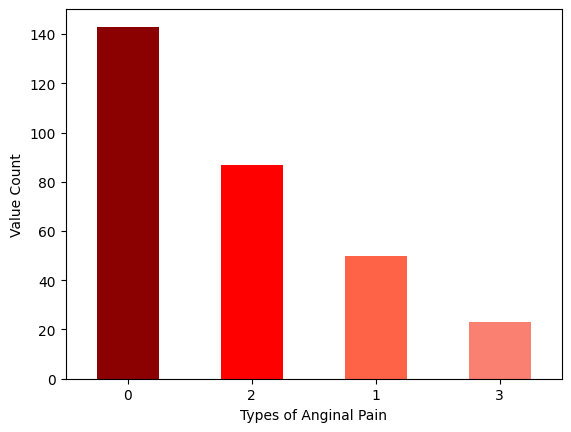

In [ ]:
# Let's see anginal pains
ax = df["cp"].value_counts().plot(xlabel="Types of Anginal Pain",
                                  ylabel= "Value Count",
                                  kind="bar",
                                  color=["darkred", "red","tomato", "salmon"])
plt.xticks(rotation=0);

In [ ]:
# Let's compare it with target
pd.crosstab(df["cp"], df["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


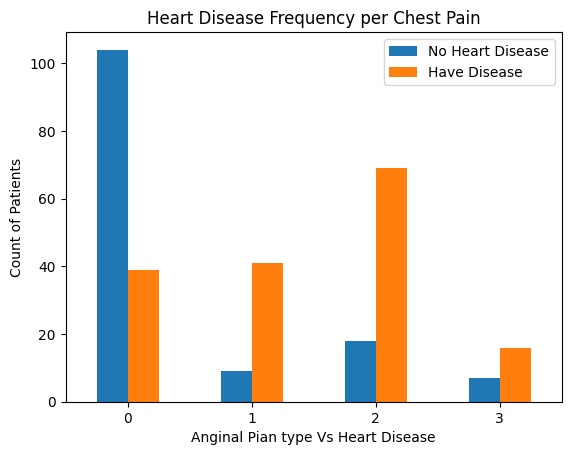

In [ ]:
pd.crosstab(df.cp, df.target).plot(kind="bar")

plt.legend(["No Heart Disease", "Have Disease"])
plt.xlabel("Anginal Pian type Vs Heart Disease")
plt.ylabel("Count of Patients")
plt.title("Heart Disease Frequency per Chest Pain")
plt.xticks(rotation=0);

**Inference drawn from above analysis** <br>
Even type 2 is not realated to heart disease we have highest number of patients with that case.

## Correaltional Matrix analysis

In [ ]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


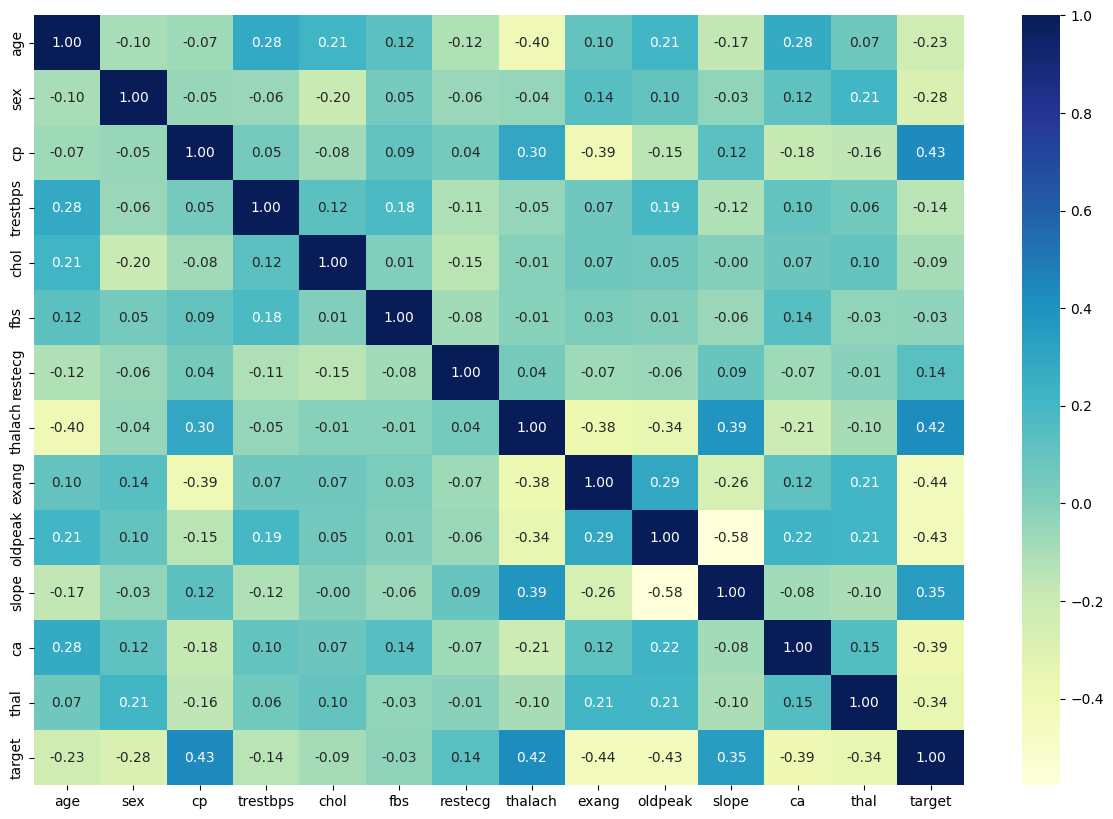

In [ ]:
corr_matrix = df.corr()

# Making our matrix beautiful
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 fmt=".2f",
                 cmap="YlGnBu");

**Inference drawn from above analysis**<br>

* *Positive Correlation*: When one col value increases other will also increase(Directlly Proportional)

* *Negative Correlation*: When one col value increases other will decrease(Inversely Proportional)

* *Zero Correaltion*: It means there is no relation between two columns, so the values around zero shows that these columns are not related

* Its value ranges from -1 to 1 and shows how potentially two columns are related.

# Modelling- Building a model for Prediction

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Split the data now
X = df.drop("target", axis=1)
y = df["target"]

X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [ ]:
# Set the seed to produce the result again
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)


In [ ]:
len(X_train), len(X_test)

(242, 61)

### Training the model

Trying with 3 Different Models
* Logistic Regression
* K-Nearest Neighbour Classifier
* Ensemble Classifier

We are going to make function and putting models in dictionary as we need to use it three times

In [ ]:
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
  """
  Fits and evaluate machine learning models.
  models: A dict of different ml models
  X_train: Training feature data
  X_test: Testing feature data
  y_train: training labels(target value)
  y_test: testing labels

  """
  # Set Random seed
  np.random.seed(42)

  model_scores = {}

  for name, model in models.items():
    model.fit(X_train, y_train)

    # name meaans here that same name of model which is model dict
    model_scores[name] = model.score(X_test, y_test)
  return model_scores




In [ ]:
models.items()

dict_items([('Logistic Regression', LogisticRegression()), ('KNN', KNeighborsClassifier()), ('Random Forest', RandomForestClassifier())])

In [ ]:
model_scores = fit_and_score(models,
                             X_train,
                             X_test,
                             y_train,
                             y_test)
model_scores

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Comparison of Model_scores

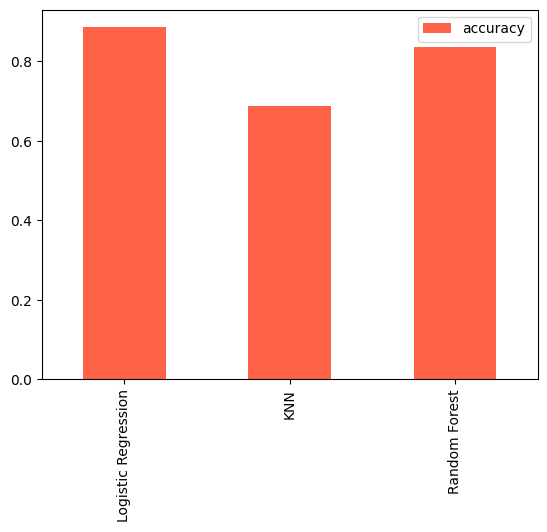

In [ ]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])

# T for transpose it looks better
model_compare.T.plot(kind="bar", color="tomato");

# Logistic Regression tops by 88% as name is regression only its used for classification

# Improving The Model

As we got a baseline model now, we will try to improve all threee models now by doing improving and evaluation parameters

* Hypeparameter Tuning
* Feature Importance
* Confusion Matrix
* Cross-validation
* Precision
* Accuracy (covered by default)
* Recall
* F1 score
* Classification Report
* ROC curve
* Area Under The curve (AUC)



### Hyperparameter tuning (By hand- For KNN)

**For KNN**

In [ ]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighbours (its a hyperparams for KNN)
neighbors = range(1,21)

knn = KNeighborsClassifier()

for i in neighbors:
  knn.set_params(n_neighbors=i)

  # Let's fit the model
  knn.fit(X_train, y_train)

  # Update both list
  train_scores.append(knn.score(X_train, y_train))

  test_scores.append(knn.score(X_test, y_test))


In [ ]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [ ]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN test score on test data is: 75.41%


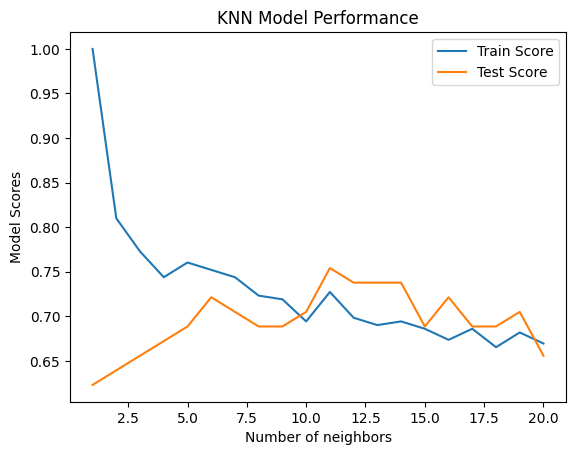

In [ ]:
# Let's visualize this (just pass x and y as a list of data)
# Plotting on one plot only

plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")

plt.xlabel("Number of neighbors")
plt.ylabel("Model Scores")
plt.title("KNN Model Performance")

# By default it will take labels as legend
plt.legend()
print(f"Maximum KNN test score on test data is: {max(test_scores)*100:.2f}%")



### Hyperparameter tuning by RandomisedSearchCV (Auto)

**We are going to tune:**<br>
* LogisticRegression()
* RandomForestClassifier()

*How to get to know how to tune hyperparameters just follow sklearn documentation**

**np.logspace((-4, 4, 20))**
It means it will calculate generate 20 numbers between (10 raise -4 to 10 raise 4)

* For RandomisedSearchCV its better to give a continuous range of values so try to give range always in grids

* Always for tuning we need to provide random search with cross validation matrix which is also random that will help model evaluation in a robust manner


In [ ]:
# Create hyperparameter grid for both models
# The value for c is for logspace considered good

log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5,10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}




In [ ]:
# Let's tune them using RandomisedSearchCV

np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=2,
                                n_jobs=-1)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions=rf_grid,
                                cv=5,
                                n_iter=20,
                                verbose=2,
                                n_jobs=-1)



In [ ]:
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=2)

In [ ]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [ ]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Now we've tuned LogisticRegression but we got same value

In [ ]:
# Let's do it for RandomForestClassifier()
rs_rf.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=2)

In [ ]:
rs_rf.best_params_

{'n_estimators': 560,
 'min_samples_split': 6,
 'min_samples_leaf': 7,
 'max_depth': 3}

In [ ]:
rs_rf.score(X_test, y_test)

0.8688524590163934

### Second Model Comparison

In [ ]:
model_scores_2 = {"KNN": max(test_scores),
                  "LogisticRegression": rs_log_reg.score(X_test, y_test),
                  "RandomForestClassifier": rs_rf.score(X_test, y_test)}

In [ ]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

<Axes: >

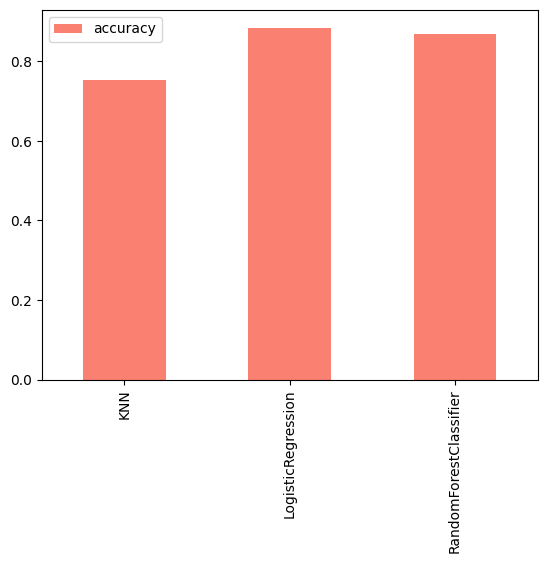

In [ ]:
model_compare_2 = pd.DataFrame(model_scores_2, index=["accuracy"])

model_compare_2.T.plot(kind="bar", color="salmon")

**Inference from above evaluation**<br>
Still Logistic Regression Tops in all three when we do by RandomisedSearchCV

### Hyperparameter Tuning with GridSearchCV

* Since LogisticRegression tops all the time we will use grid searchCV only on this model

In [ ]:
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup gs Cv for logistic Regression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid= log_reg_grid,
                          n_jobs=-1,
                          verbose=True,
                          cv=5)

# Fit the model now
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [ ]:
# Check best params
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [ ]:
# Let's evaluate it

gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [ ]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

**Inference from above analysis** <br>
We're finalising the gs_log_reg model as it performs <br>
constantly best in all three and we will use all <br>
classification evaluation metrics on this.


# Evaluation of our tuned machine learning Classifier

* ROC curve and AUC score
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1-Score

To maek comparisons and evaluate our trained model, we will make first prediction

In [ ]:
# Make predictions for the model
y_preds = gs_log_reg.predict(X_test)

y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

### ROC curve
Comparison of true positive against false positive

* Receiver operating Characteristic curve plots all possible confusion matrix by shifting threshold value

*

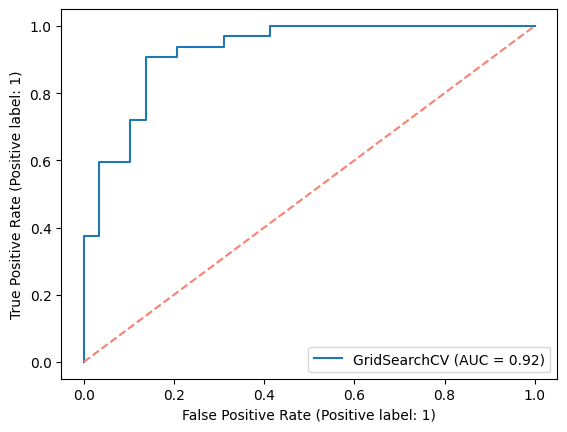

In [ ]:
display = RocCurveDisplay.from_estimator(gs_log_reg,
                               X_test,
                               y_test);

plt.plot([0,1], [0,1], color="salmon", linestyle="--");

**Inference from above analysis**
<br>
The more the line is above the central diagonal line is better the model <br>
Left of the line shows higher proportion of tpr <br>
And AUC score of greater than 0.9 is considered good.

### Confusion Matrix

* It's a matrix that have:
  * True positive (1 hai toh 1 diya)
  * False Positive (1 hai lekin 0 diya)
  * True Negative(0 hai toh 0 diya)
  * False Negative(0 hai lekin 1 diya)

In [ ]:
conf_matrix = confusion_matrix(y_test, y_preds)

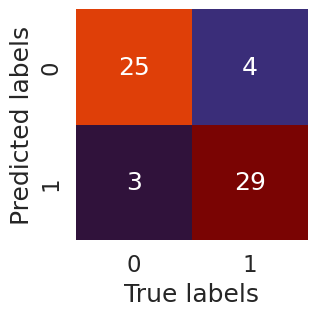

In [ ]:
# Plotting with seaborn heatmap

sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
  """
  Plotting a nice looking confusion matrix using Seaborn's heatmap

  """
  fig, ax = plt.subplots(figsize=(3,3))
  ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                   cbar=False,
                   annot=True,
                   cmap="turbo")
  plt.xlabel("True labels")
  plt.ylabel("Predicted labels")

  # These lines are if our matrix doesn't fit values in well manner
  # bottom, top = ax.get_ylim()
  # ax.set_ylim(bottom+0.5, top-0.5)

plot_conf_mat(y_test, y_preds)

**Inference from above analysis** <br>
We have to take care to decrease fp and tp because both cases are not good for heart disease prediction

### Classification Report and other Cross Validated Parameters

* Classification parameter is only on one test dataset i.e X_test
* But we try to do it in cross validated score

*Precision*: Model which produces no false positives have 1 precision.
<br>
*Recall*: Model which produces no false negative have 1 recall

*f1-score*: combination(mean) of recall and precision score

*support*: Shows Balance of data

*Macro avg*: It doesn't consider class imbalances

*Weighted avg*: Each metric here is considere by number of class samples, so if one class has more samples, it have more weight.

In [ ]:
class_report = classification_report(y_test, y_preds)
print(class_report)

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [ ]:
# Check bast hyperparams as we need best model
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [ ]:
# Create a new classifier with best params
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [ ]:
# Create a dictionary to store the best model metrics which we got from cross_val_score
clf_cross_val_means = {}


In [ ]:
# Cross validated Accuracy Score
cv_acc= cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="accuracy")


# Take the mean of 5 different splits
cv_acc = np.mean(cv_acc)
clf_cross_val_means["Accuracy"] = cv_acc

In [ ]:
# Cross validated precision score
cv_precision= cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="precision")
cv_precision = np.mean(cv_precision)
clf_cross_val_means["Precision"] = cv_precision

In [ ]:
# Cross validated recall score
cv_recall= cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="recall")
cv_recall = np.mean(cv_recall)
clf_cross_val_means["recall"] = cv_recall

In [ ]:
# Cross validated f1 score
cv_f1= cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="f1")
cv_f1 = np.mean(cv_f1)
clf_cross_val_means["f1-score"] = cv_f1

In [ ]:
clf_cross_val_means

{'Accuracy': 0.8446994535519124,
 'Precision': 0.8207936507936507,
 'recall': 0.9212121212121213,
 'f1-score': 0.8673007976269721}

In [ ]:
cross_val_df = pd.DataFrame(clf_cross_val_means, index=["Scores"])
cross_val_df

,Accuracy,Precision,recall,f1-score
Scores,0.844699,0.820794,0.921212,0.867301


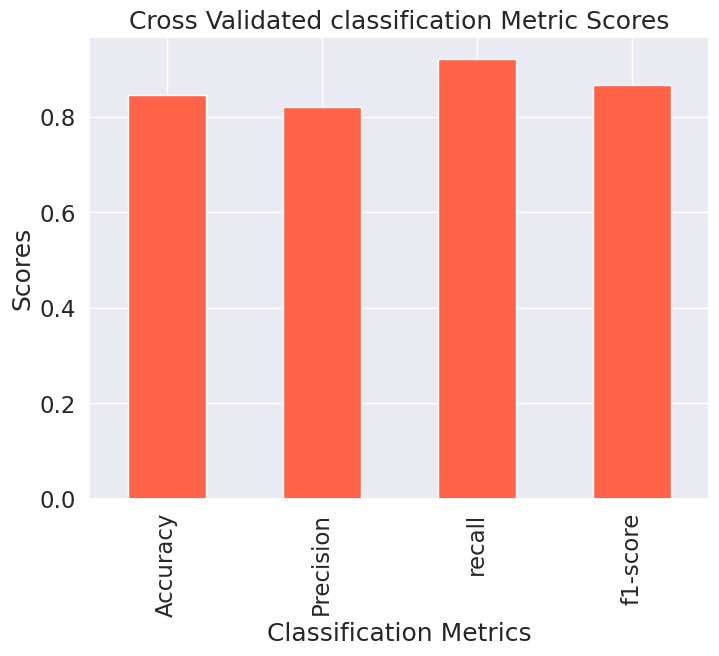

In [ ]:
cross_val_df.T.plot(kind="bar", color="tomato",
                    figsize=(8,6), legend=False)
plt.title("Cross Validated classification Metric Scores")
plt.xlabel("Classification Metrics")
plt.ylabel("Scores");

# Feature Importance

Feature importance means: <br>
Which features contributed most to outcomes of model and how did they contribute ? <br>

Finding feature importance is different for each machine learning model

In [ ]:
# Fit an instance of LogisticRegression
clf

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [ ]:
# I am using best clf model here
clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [ ]:
# Check coef_
clf.coef_

array([[ 0.00320769, -0.86062049,  0.66001432, -0.01155971, -0.00166496,
         0.04017236,  0.31603405,  0.02458922, -0.60470171, -0.56795456,
         0.45085392, -0.63733328, -0.67555094]])

### Best way of mapping a dict values

In [ ]:
# Match coef's of features to columns
# This shows that how much it's helping in prediction

feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0032076883508599633,
 'sex': -0.8606204883695241,
 'cp': 0.660014324982524,
 'trestbps': -0.01155970600550047,
 'chol': -0.0016649614843449207,
 'fbs': 0.040172360271308105,
 'restecg': 0.31603405294617176,
 'thalach': 0.02458922341328129,
 'exang': -0.604701713592625,
 'oldpeak': -0.5679545646616215,
 'slope': 0.4508539209693025,
 'ca': -0.6373332766360461,
 'thal': -0.6755509369619848}

Text(0.5, 1.0, 'Feature Importance')

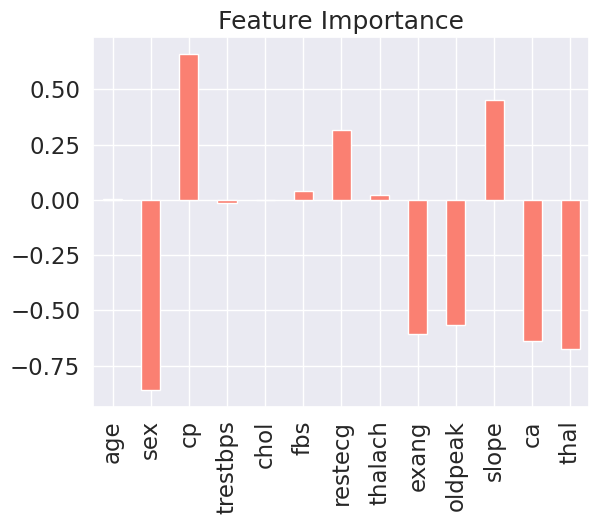

In [ ]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot(kind="bar", legend=False, color="salmon")
plt.title("Feature Importance");

**Inference from above analysis**: <br>
* This is model driven correaltion between other cols and target

* If some features are not contributing we can remove it
* And we can also add more in that features which is important for our model

* We can also analyse whether model is considering right features or not.